


Default Of Credict Card Client: Machine Learning Project

Seeniya George

Entri Elevate

 Problem Statement Financial institutions face challenges in managing credit risk due to client defaults. Using the Default of Credit Card Clients Dataset, the goal is to build a machine learning model to:
 
Objective:

    Predict the likelihood of a client defaulting on their credit card payments.
    Provide actionable insights to improve lending decisions and risk-based pricing

 The project aims to:

    Develop a classification model to predict whether a client will default.
    Use model predictions to categorize clients into low, medium, and high-risk groups.
    Interpret feature importance to derive actionable business insights.

 Dataset Overview

 Data Source:  UCI Machine Learning Repository link: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

The **Default of Credit Card Clients Dataset** contains:

- 30,000 records of credit card clients.
- Features include demographic, financial, and behavioral attributes (e.g., age, credit limit, payment history).
- Target variable: `default payment next month` (1 = default, 0 = no default).


    Limit Balance: The limit balance of the amount of credit given in dollars

    Sex : gender (1=male, 2=female)

    Education_Level : education level/Education level (1 = Masters, 2 = University,
3 = High School, 4 = others)

    Marital_Status : Marital status (1 = married, 2 = single, 3 = others)

    Age : age or age in years

    pay_0 : Payment status in September 2005 (-2 = no consumption, -1 = pay fairly,
0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months,
… 8 = late payment for eight months, -9 = late payments for nine months and over)

    pay_2 : Payment status in August 2005 
    pay_3 : Payment status in July 2005 
    pay_4 : Payment status in June 2005 
    pay_5 : Payment status in May 2005 
    pay_6 : Payment status in April 2005 

    bill_amt_1 : Total bill for September 2005 
    bill_amt_2 : Total bill for August 2005 
    bill_amt_3 : Total bill for July 2005 
    bill_amt_4 : Total bill for June 2005 
    bill_amt_5 : Total bill for May 2005 
    bill_amt_6 : Total bill for April 2005 

    pay_amt_1 : Amount of previous payment in September 2005 
    pay_amt_2 : Amount of previous payment in August 2005 
    pay_amt_3 : Amount of previous payment in July 2005 
    pay_amt_4 : Amount of previous payment in June 2005 
    pay_amt_5: Amount of previous payment in May 2005 
    pay_amt_6: Amount of previous payment in April 2005 

    default_payment_next_month: default payment next month (1=yes, 0=no)

It is hoped that it will produce an analysis that can provide information from the credit card system for the consideration of users in using credit card services. Or as an evaluation of credit card service providers.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, roc_curve, auc
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [30]:
print("Loading default of credict card client...")
data=pd.read_csv('credit_customer.csv')
data.head(10)

Loading default of credict card client...


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [31]:
df=pd.DataFrame(data)

In [32]:
df.shape

(30000, 25)

In [33]:
#Basic Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Data Cleaning ....

In [34]:
df.duplicated().sum()

0

There are no duplicated values

In [35]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values present.

In [ ]:
Display numarical columns

In [36]:

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [80]:
#.Data Preprocessing
print("\nPerforming Preprocessing procedure...")


Performing Preprocessing procedure...


In [37]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [38]:
#removing data columns form dataset
df.drop(columns=['ID'],inplace=True)
print('Dataframe after removing date column permently\n')
df.head()

Dataframe after removing date column permently



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Find Minimum Age and Maximum Age of customer

In [39]:
df['AGE'].min()

21

In [40]:
df['AGE'].max()

79

Visualizing Outlayers

In [41]:
#outliyers
numeric_columns =  df.select_dtypes(include = ['number'])

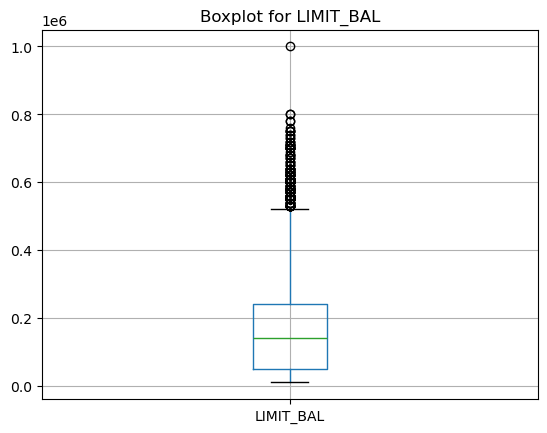

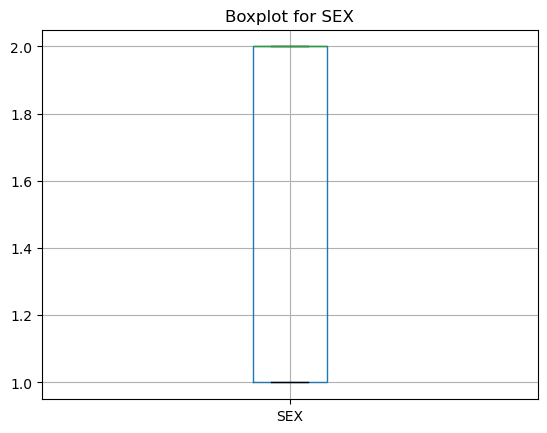

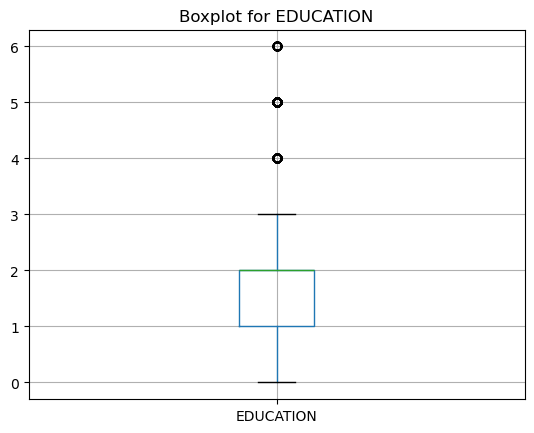

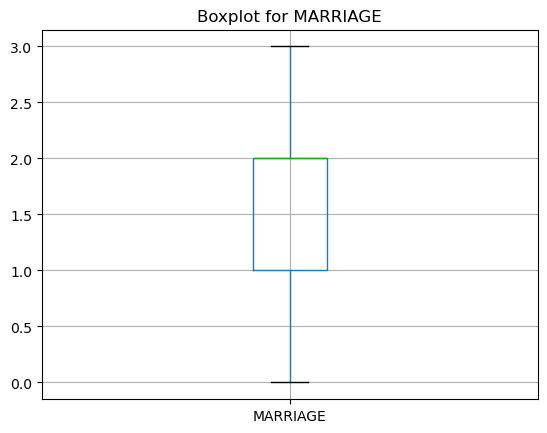

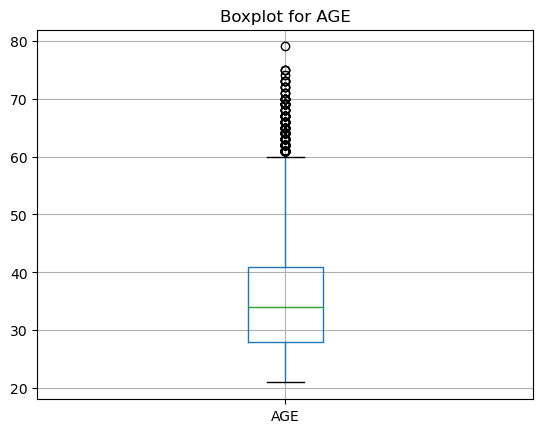

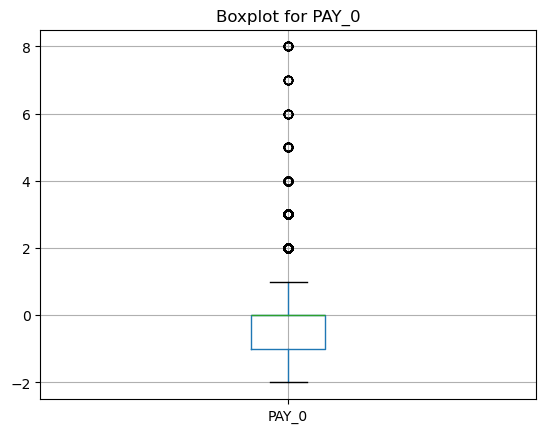

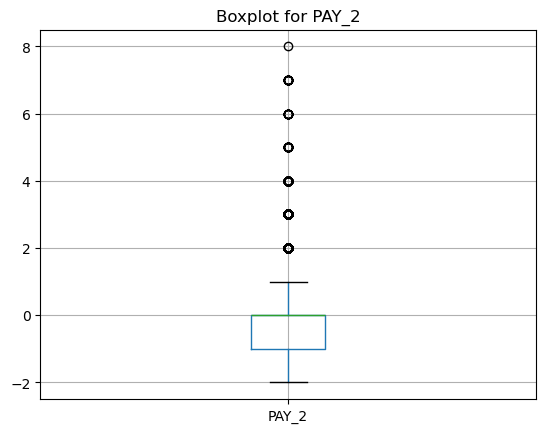

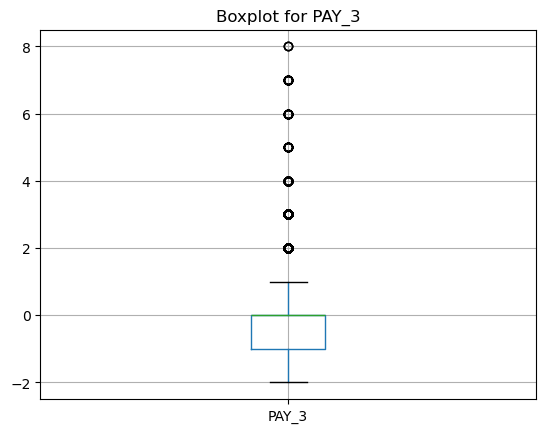

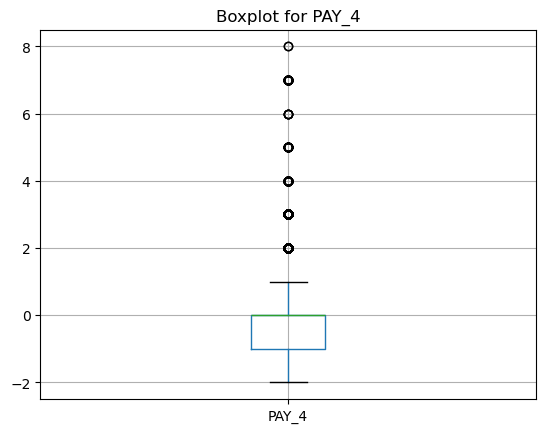

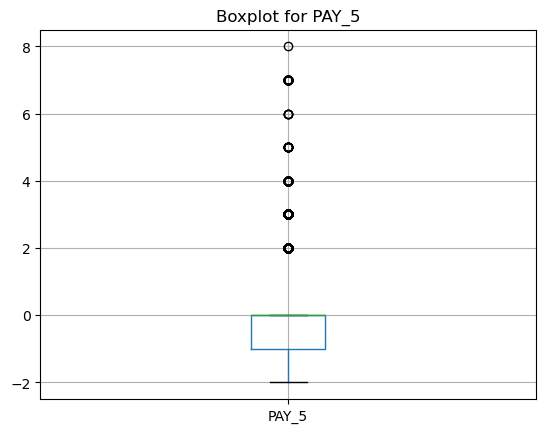

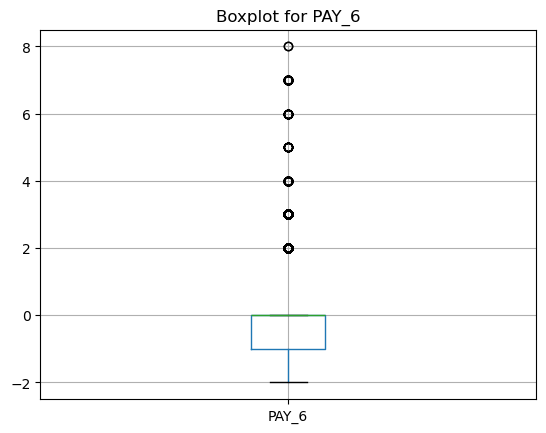

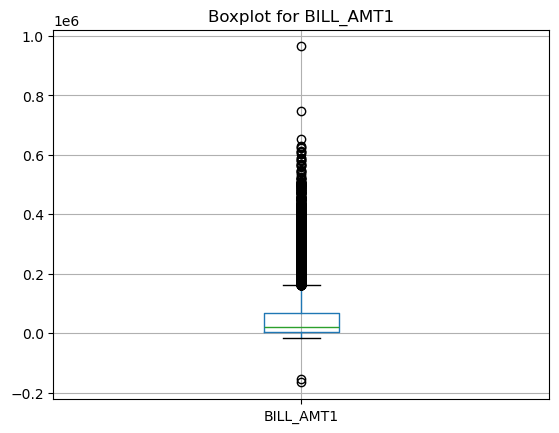

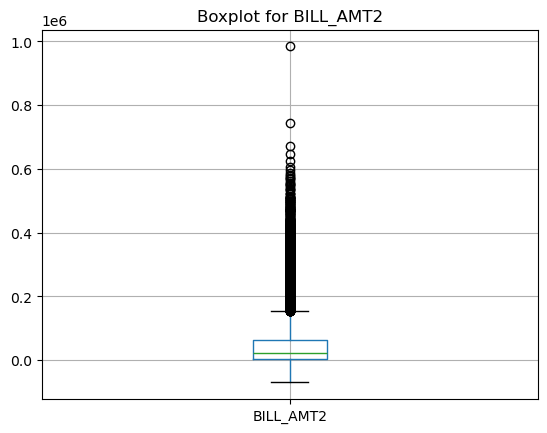

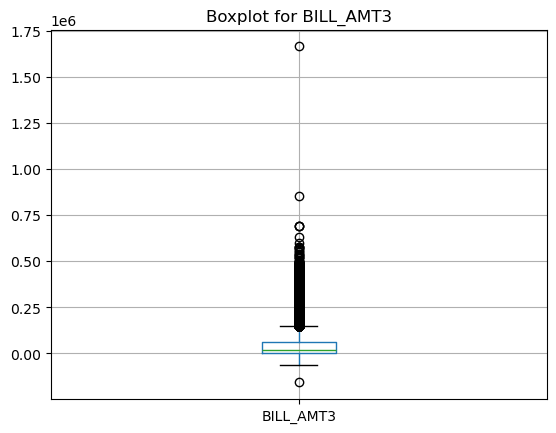

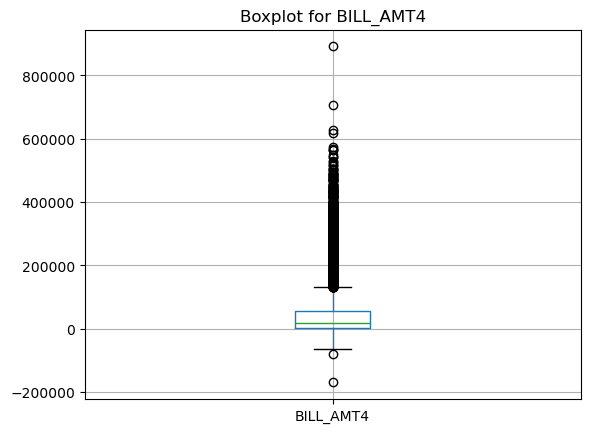

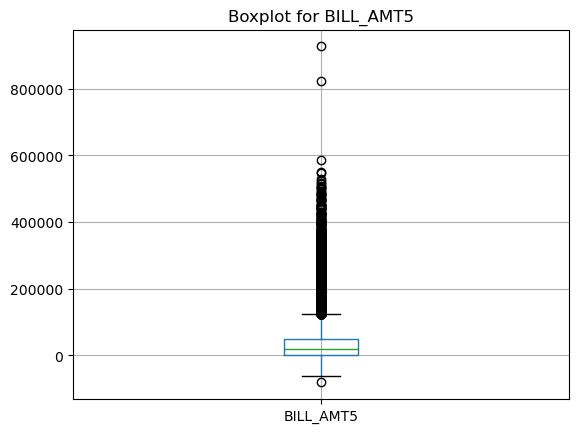

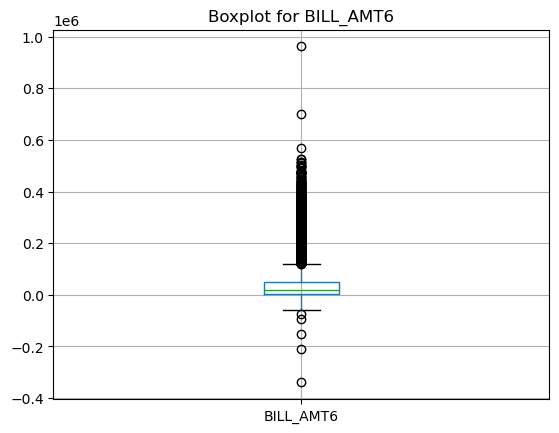

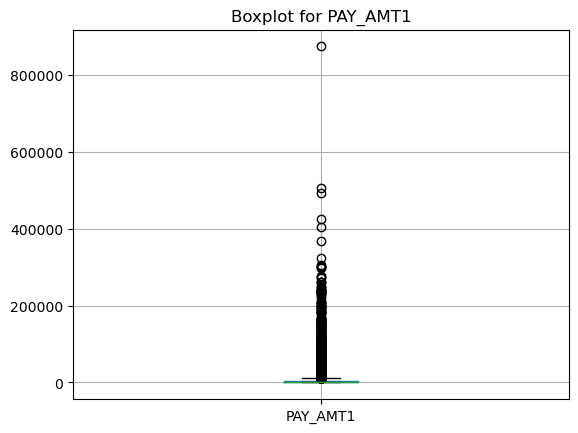

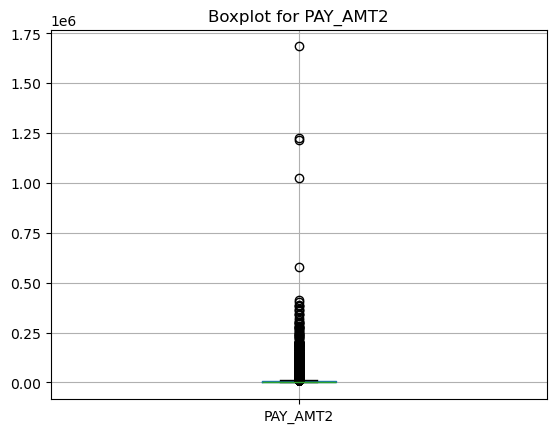

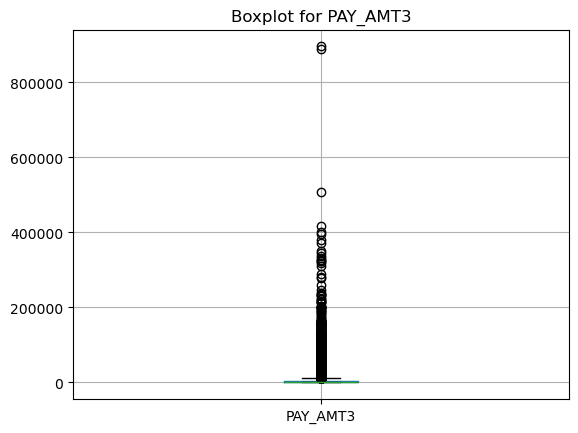

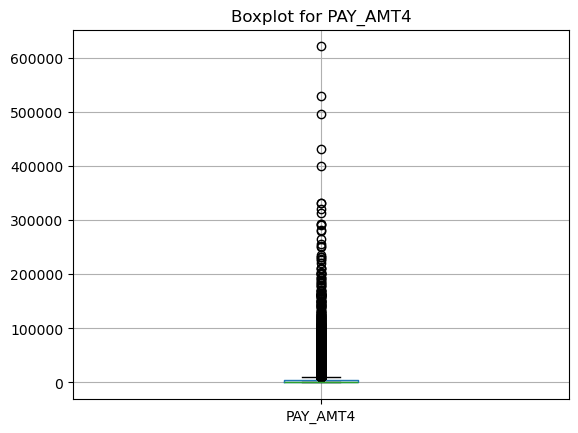

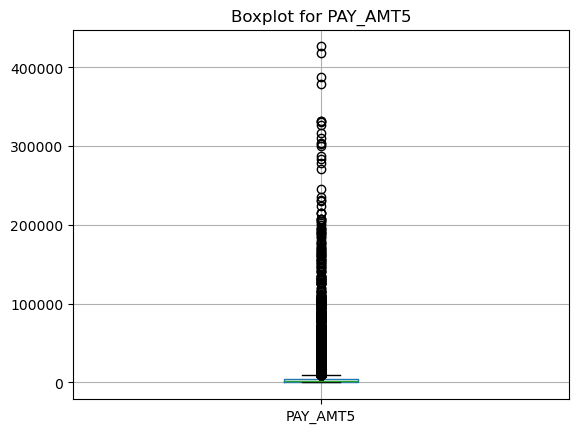

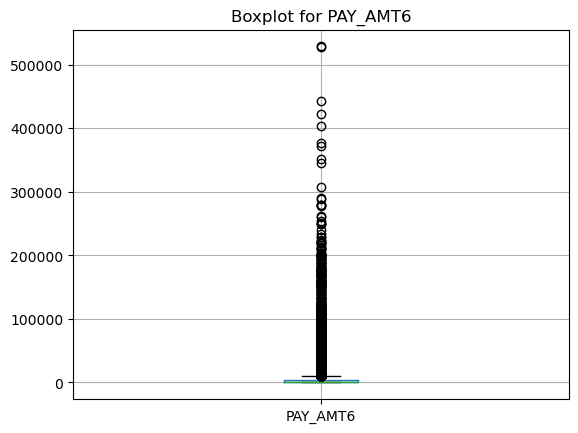

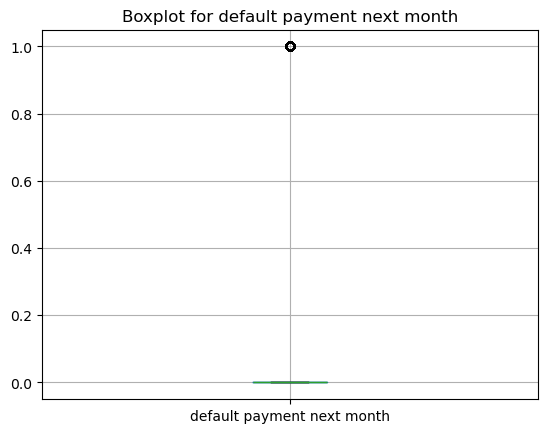

In [42]:
#forloop
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

Outlier Fixing has been handled Using IQR method

In [43]:
outlier_fix_columns = [ 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
IQR method to fixing outliers

In [44]:
# Fix Outliers using the IQR method
for column in outlier_fix_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower whisker
    upper_bound = Q3 + 1.5 * IQR    # Upper whisker
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [ ]:
After fixing outlier to boxplot

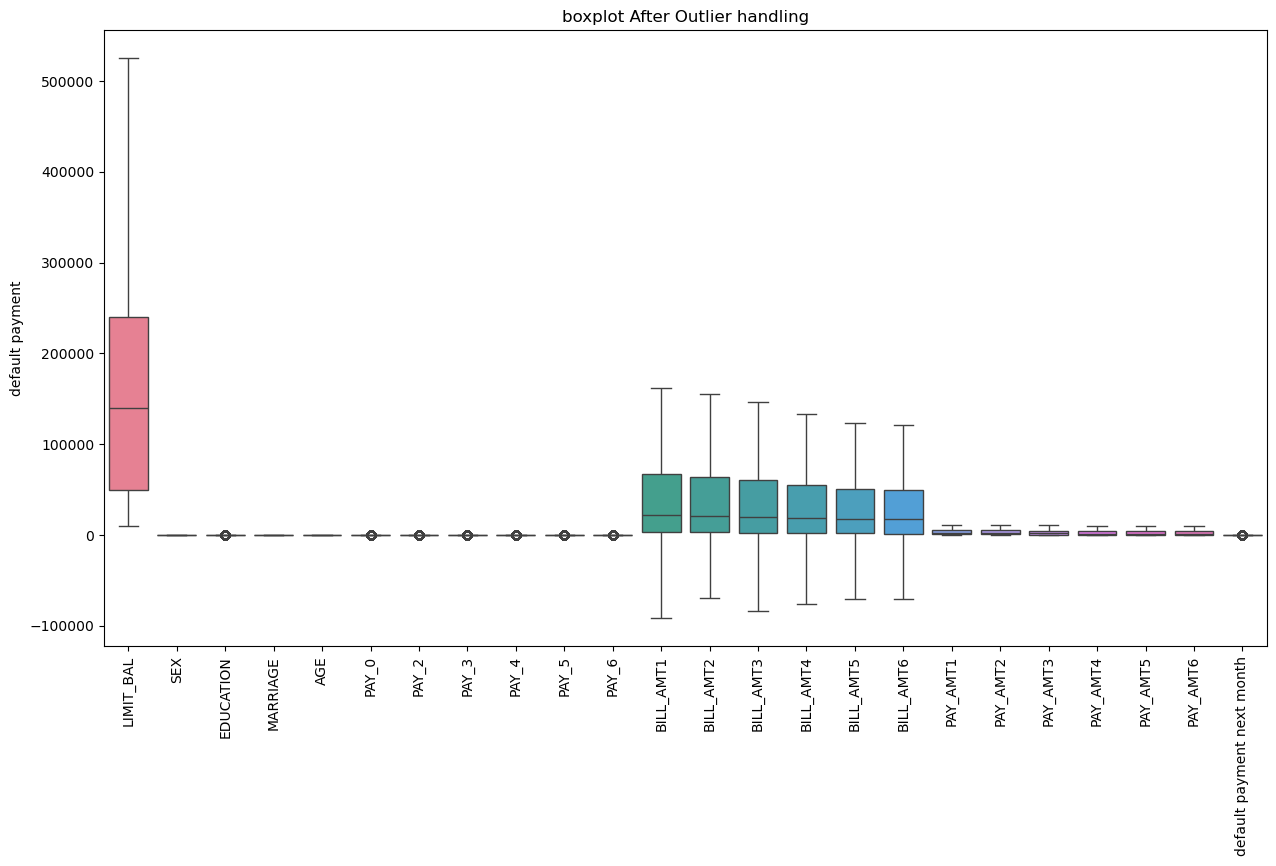

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("boxplot After Outlier handling")
plt.xticks(rotation=90)
plt.ylabel('default payment')
plt.show()

In [46]:
df[outlier_fix_columns].skew()

LIMIT_BAL    0.904504
AGE          0.654467
BILL_AMT1    1.194178
BILL_AMT2    1.189649
BILL_AMT3    1.184730
BILL_AMT4    1.183997
BILL_AMT5    1.184657
BILL_AMT6    1.199718
PAY_AMT1     1.032414
PAY_AMT2     1.113399
PAY_AMT3     1.200528
PAY_AMT4     1.176348
PAY_AMT5     1.183906
PAY_AMT6     1.211015
dtype: float64

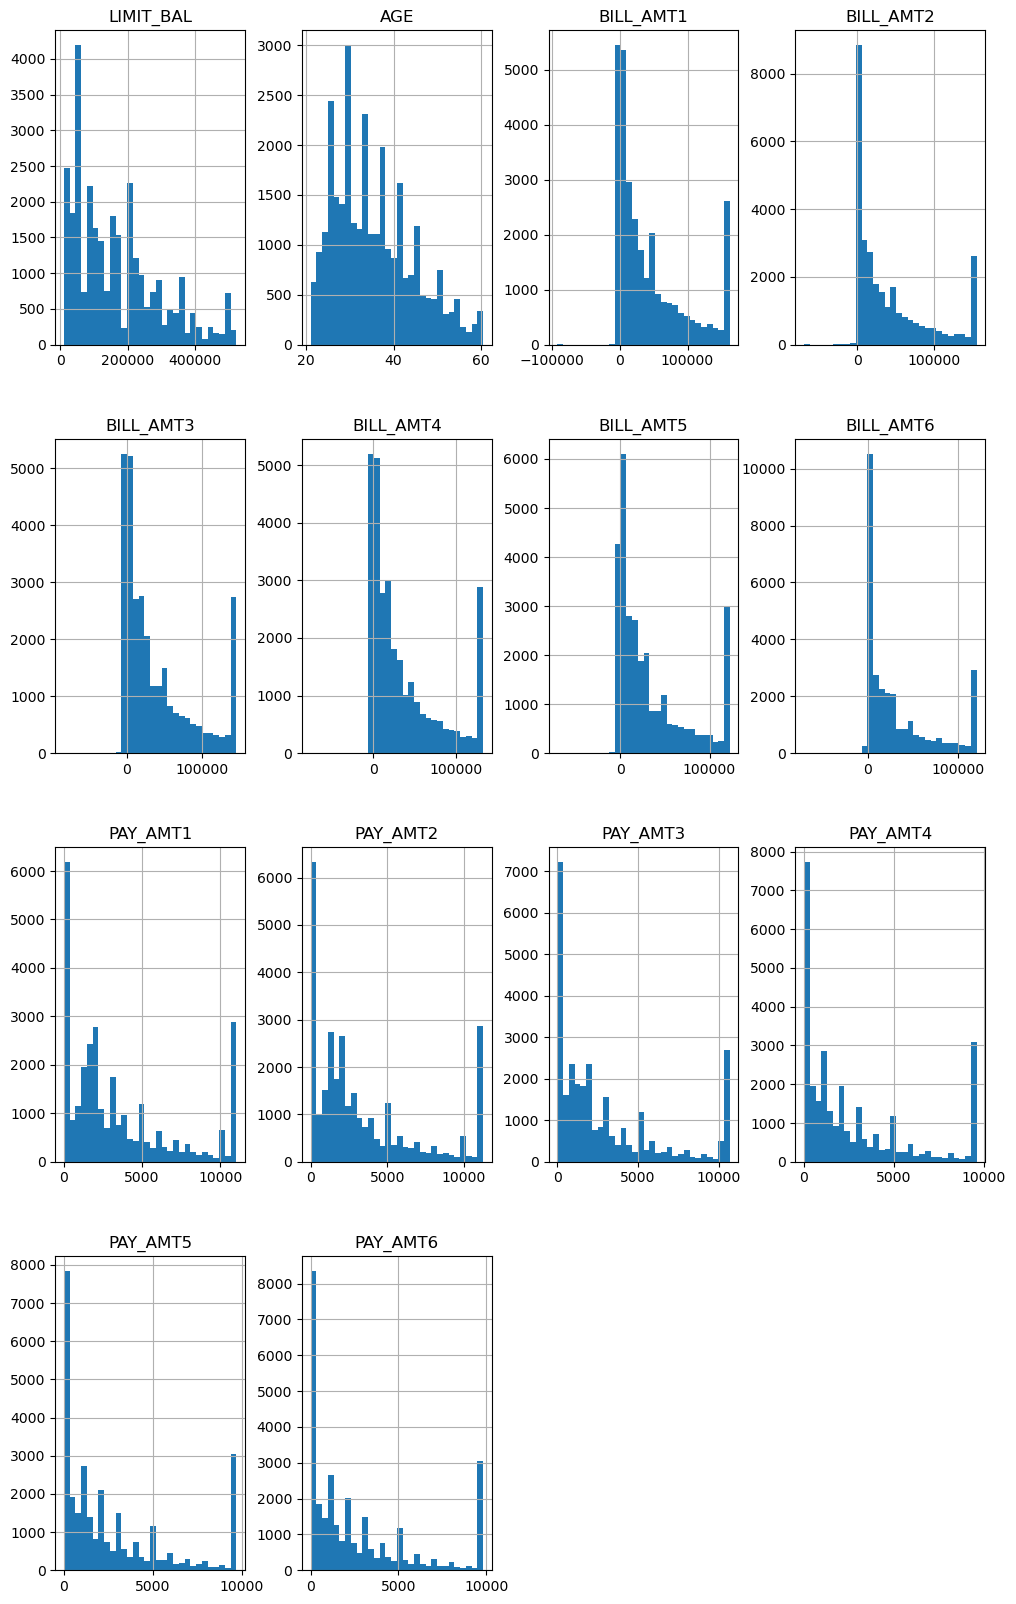

In [47]:
# Plot histograms before transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()

In [48]:
# Applying square root transformation to fix skewness of needed features

df[outlier_fix_columns] = np.sqrt(np.abs(df[outlier_fix_columns]) + 1)

In [49]:
print(df[outlier_fix_columns].skew())


LIMIT_BAL    0.247482
AGE          0.436065
BILL_AMT1    0.437944
BILL_AMT2    0.422110
BILL_AMT3    0.415432
BILL_AMT4    0.418846
BILL_AMT5    0.427006
BILL_AMT6    0.448018
PAY_AMT1     0.095435
PAY_AMT2     0.163805
PAY_AMT3     0.285515
PAY_AMT4     0.313511
PAY_AMT5     0.308738
PAY_AMT6     0.332968
dtype: float64


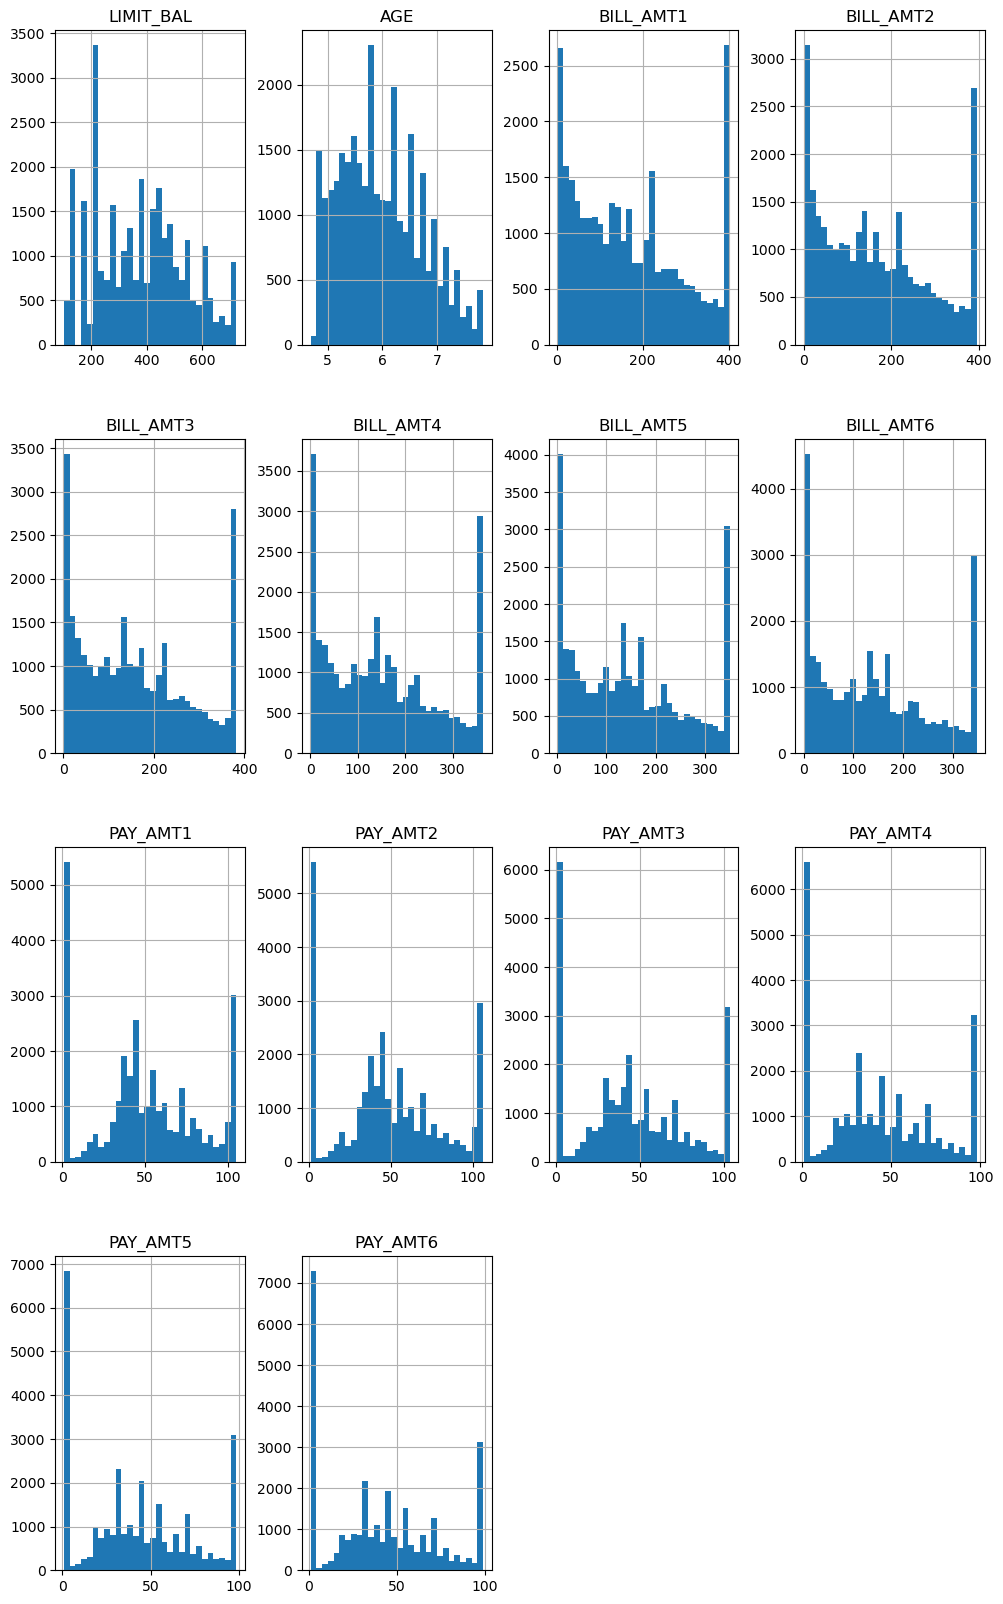

In [50]:
# Plot histograms After transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()

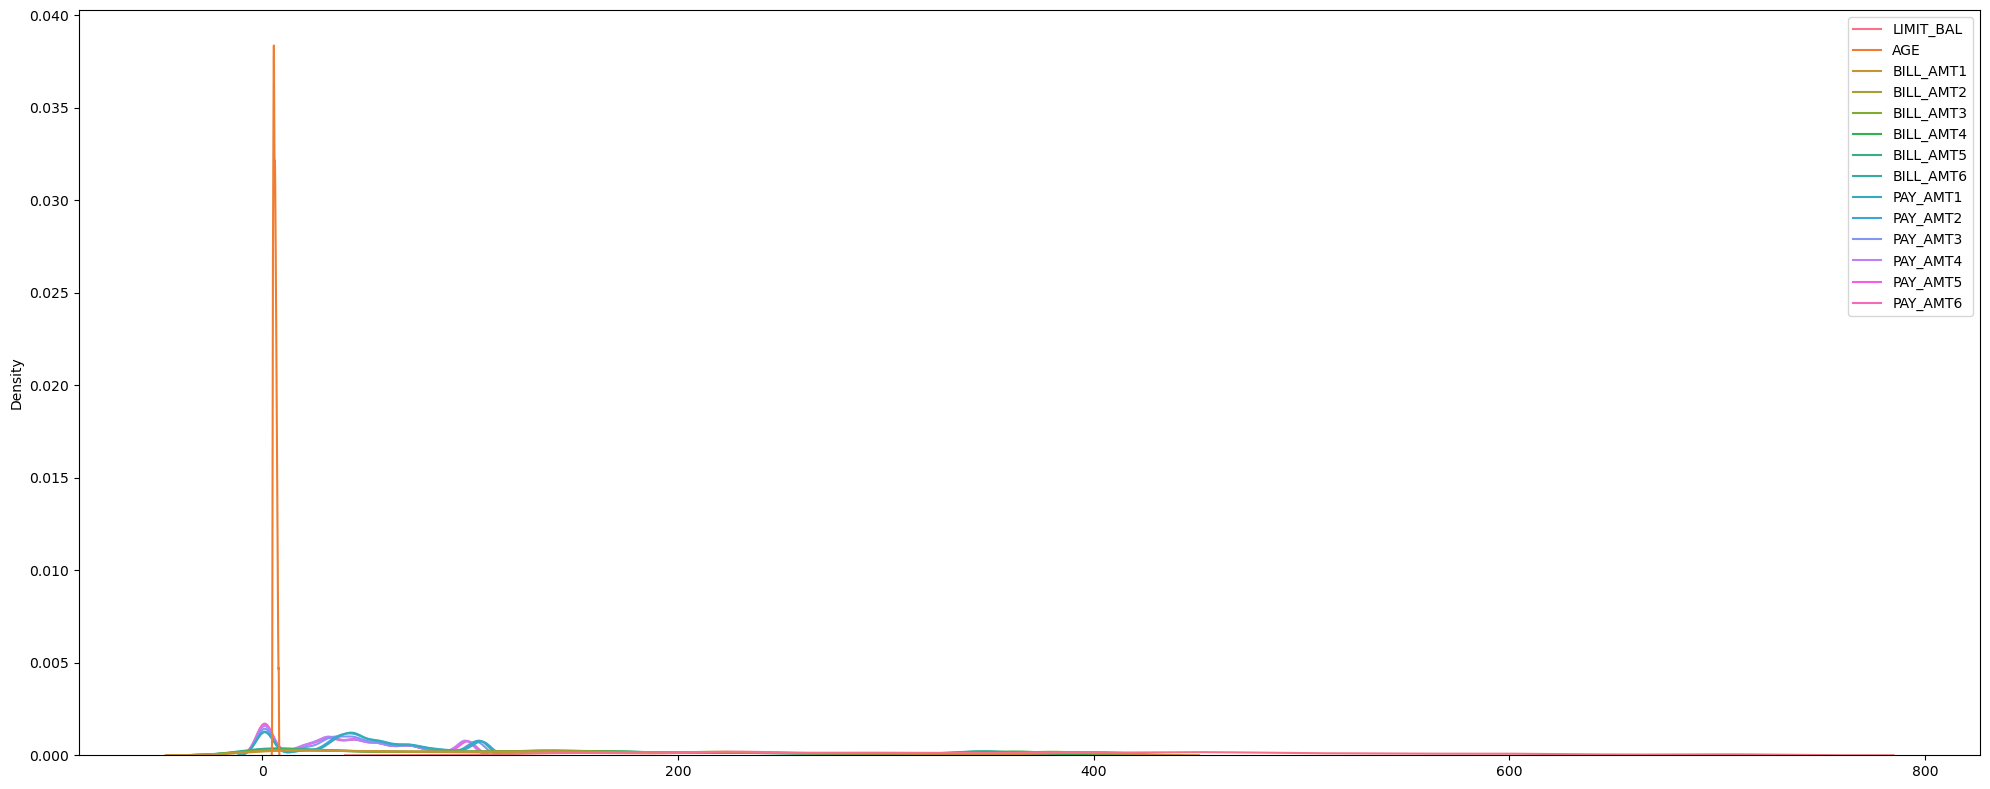

In [51]:
# Drawing KDE plot
plt.figure(figsize=(20,8))
sns.kdeplot(df[outlier_fix_columns])
plt.tight_layout()
plt.show()

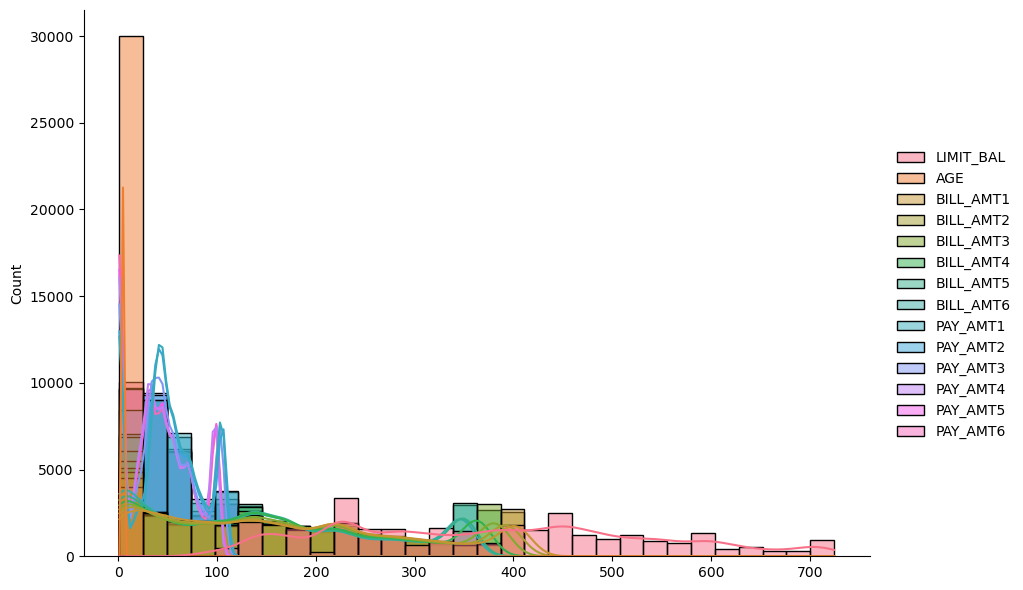

In [52]:
sns.displot(df[outlier_fix_columns], bins=30, kde=True, height=6, aspect=1.5)  # Create the distrib

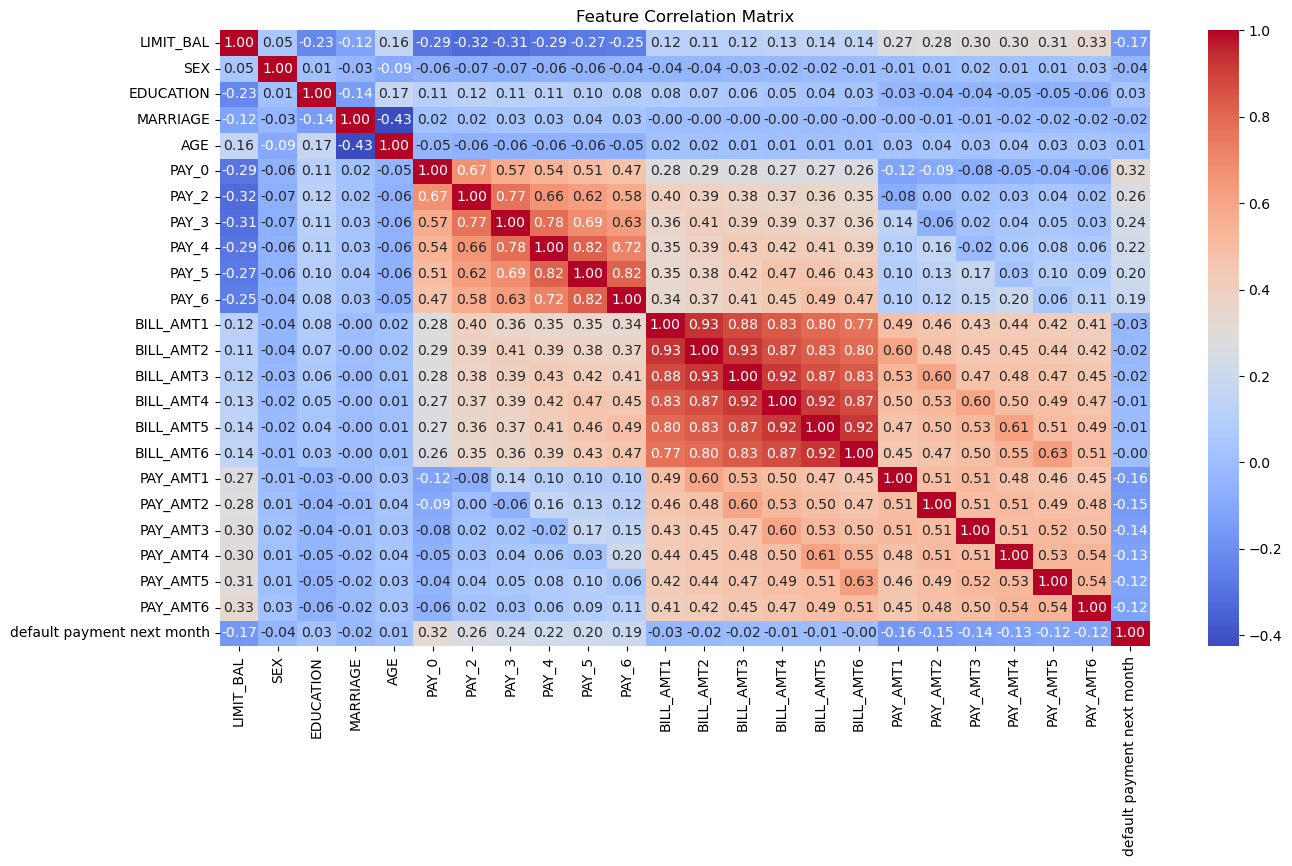

In [53]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [54]:
df['default payment next month'].unique()

array([1, 0], dtype=int64)

In [55]:
print(df['default payment next month'].value_counts())


default payment next month
0    23364
1     6636
Name: count, dtype: int64


   EDUCATION: Education level(1 = Masters, 2 = University,3 = High School, 4 = others,5=othes,6=others)


In [56]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE: Marital status where 1 is married 2 is single 3 is others and 0 is unknown

In [58]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

SEX : Gender where 1 represent MALE and 2 represent FEMALE

In [59]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

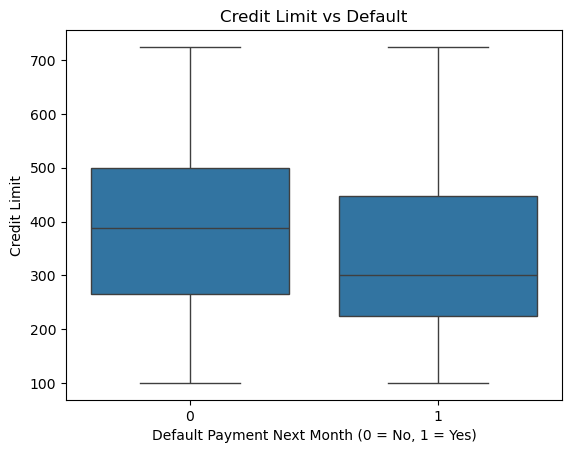

In [60]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Credit Limit vs Default')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.show()

In [61]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


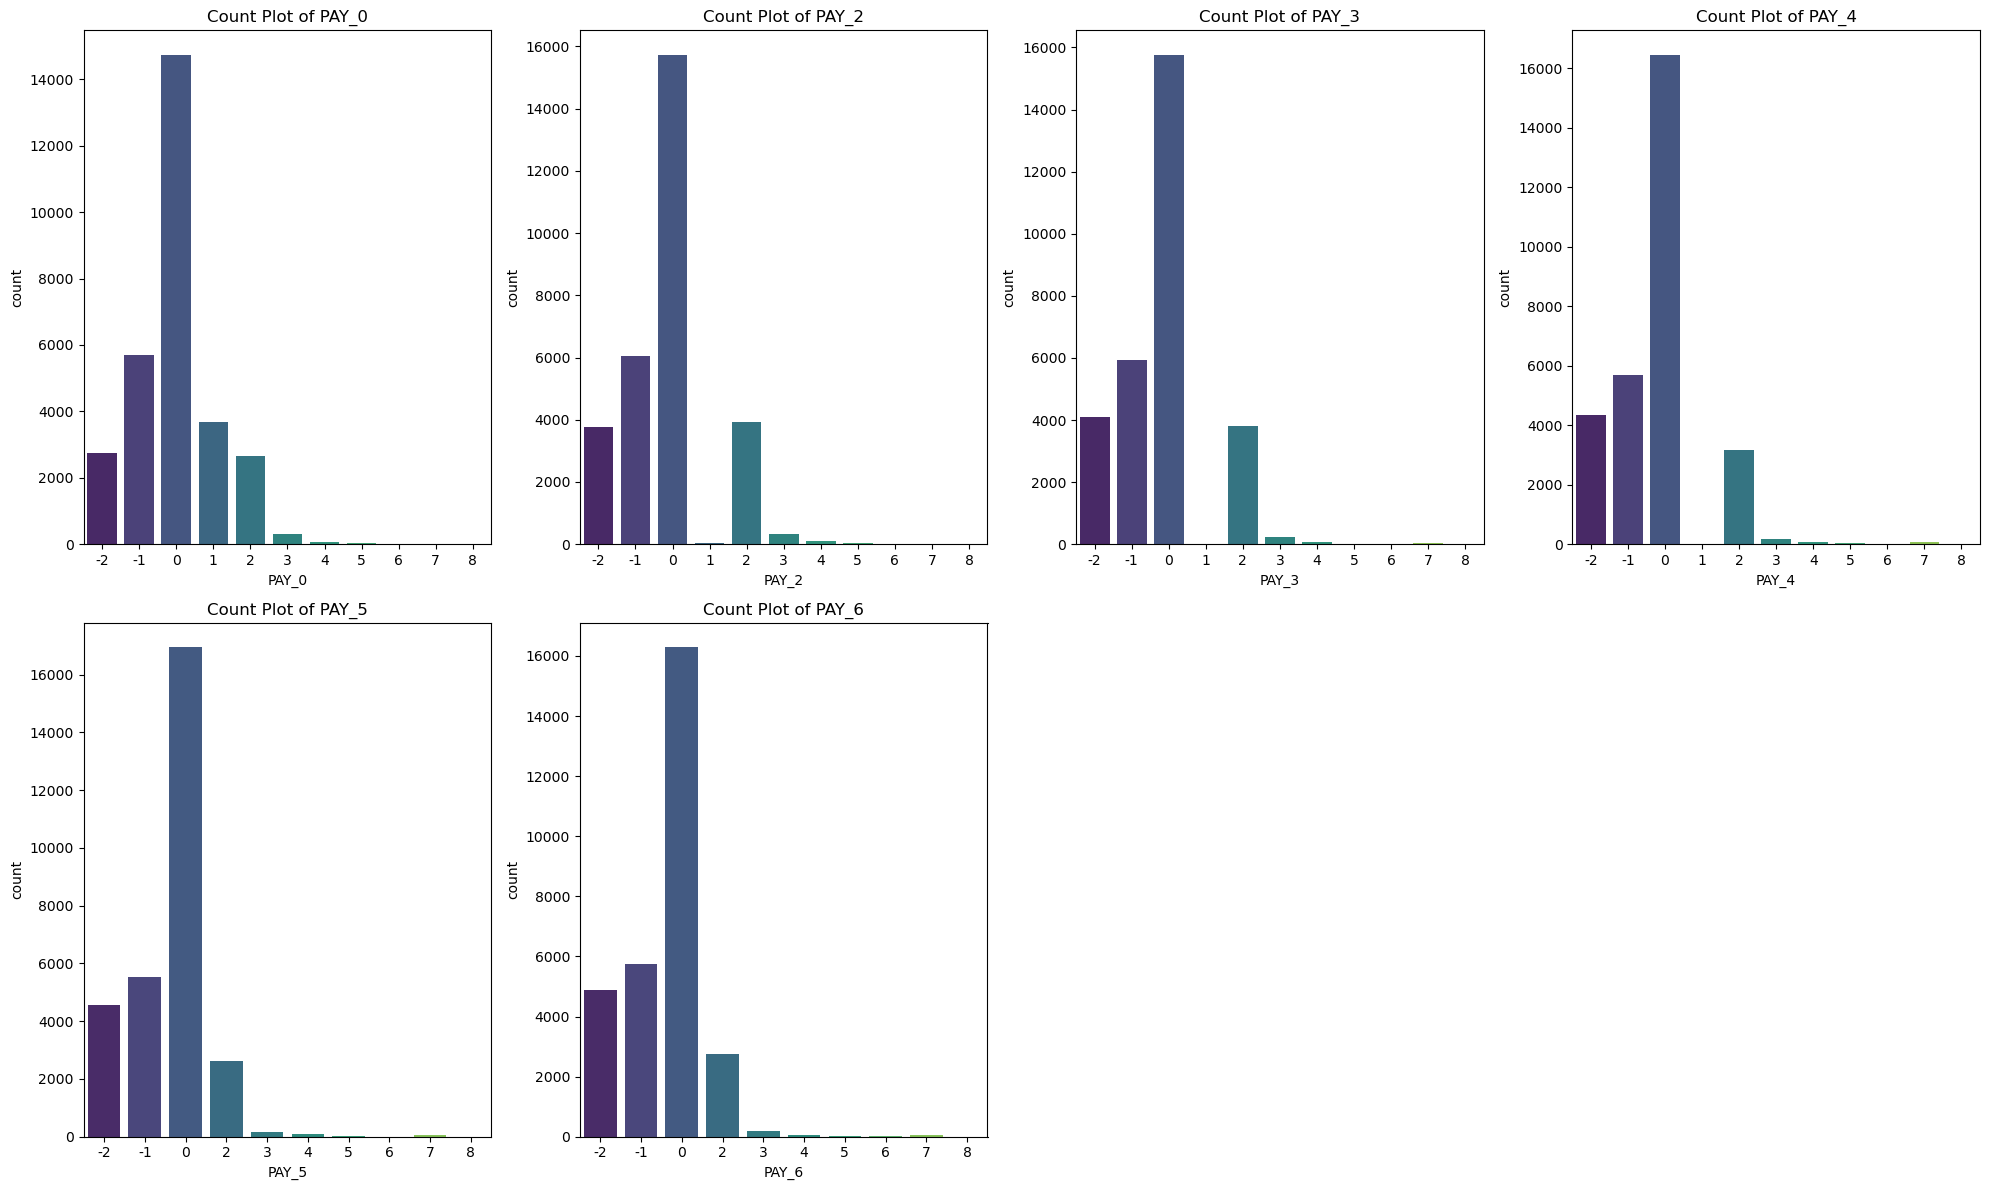

In [62]:
# Count Plot for status of  repayment 

# List of columns to plot
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


# Set the figure size
plt.figure(figsize=(20, 12))

# Loop through each PAY column and create a count plot
for i, column in enumerate(pay_columns):
    plt.subplot(2, 4, i + 1)  # Create a grid of subplots
    sns.countplot(x=df[column], palette="viridis")
    plt.title(f"Count Plot of {column}")

plt.tight_layout()  
plt.show()

In [ ]:
plot shows predetermined values-1 = Fully paid 1- 9 means delayed for 1-9 respectevely -2 = no payment 0 = no due '''

In [63]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,169.546136,165.039777,160.209956,152.550143,145.650891,141.494476
std,124.841464,123.340354,120.494675,115.532456,112.303494,112.616690
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,59.954149,55.249434,52.697249,49.000000,43.197222,36.878178
50%,149.621188,145.713760,141.793864,138.090550,134.638405,130.885446
75%,259.086375,253.028654,245.313575,233.579751,224.096519,221.928479
max,402.976891,394.384964,382.640170,364.384241,350.475035,348.012392


In [94]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,3496.730800,3422.306967,3035.817900,2718.296075,2731.547167,2714.437875
std,3492.742781,3532.819886,3355.632738,3073.301491,3094.091228,3131.180741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000
50%,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000
max,11015.000000,11250.500000,10677.500000,9589.125000,9700.000000,9823.375000


In [66]:
# Bill and Payment Columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


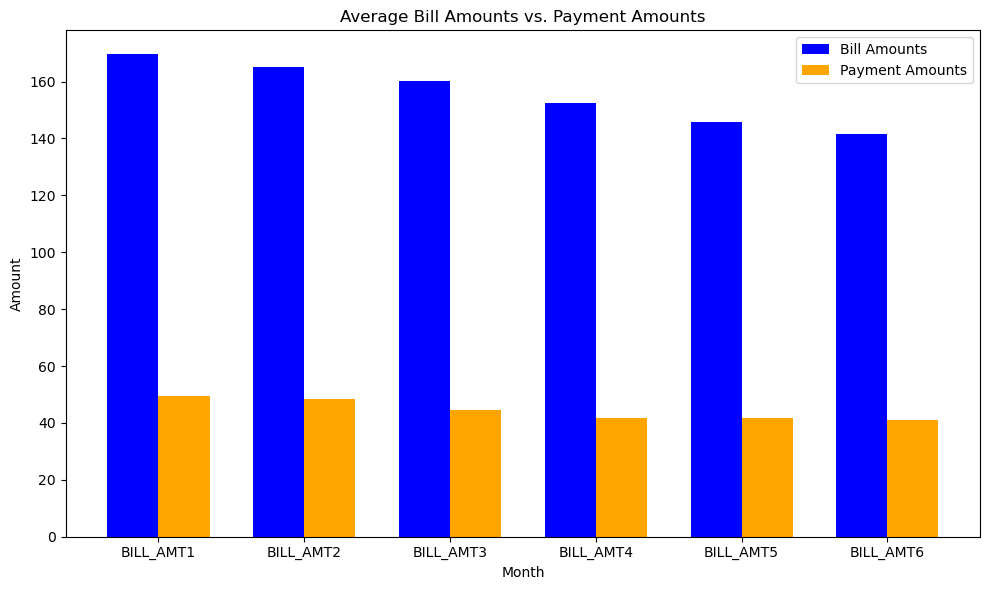

In [67]:


# Set the positions for the bars on the x-axis
x = np.arange(len(bill_columns))  # This creates an array from 0 to the number of columns (6 in this case)

# Define the width of the bars
width = 0.35  # Adjust to get enough space between bars

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bill amounts as bars
plt.bar(x - width/2, df[bill_columns].mean(), width, label='Bill Amounts', color='blue')

# Plot the payment amounts as bars
plt.bar(x + width/2, df[pay_columns].mean(), width, label='Payment Amounts', color='orange')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Average Bill Amounts vs. Payment Amounts')
plt.xticks(x, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

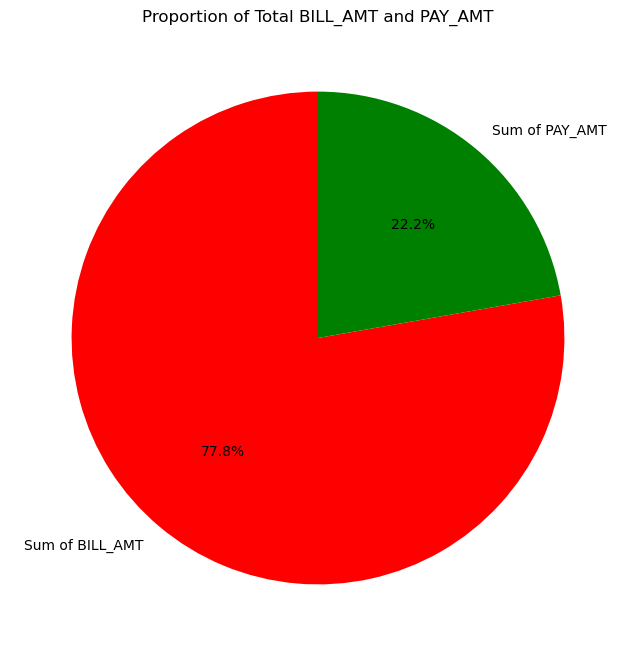

In [68]:
# Calculate the sum of all BILL_AMT and PAY_AMT columns
bill_amt_sum = df[bill_columns].sum().sum()  # Sum of all BILL_AMT columns
pay_amt_sum = df[pay_columns].sum().sum()  # Sum of all PAY_AMT columns

# Create a pie chart to show the proportion of each sum
labels = ['Sum of BILL_AMT', 'Sum of PAY_AMT']
sizes = [bill_amt_sum, pay_amt_sum]
colors = ['red', 'Green']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of Total BILL_AMT and PAY_AMT")
plt.show()

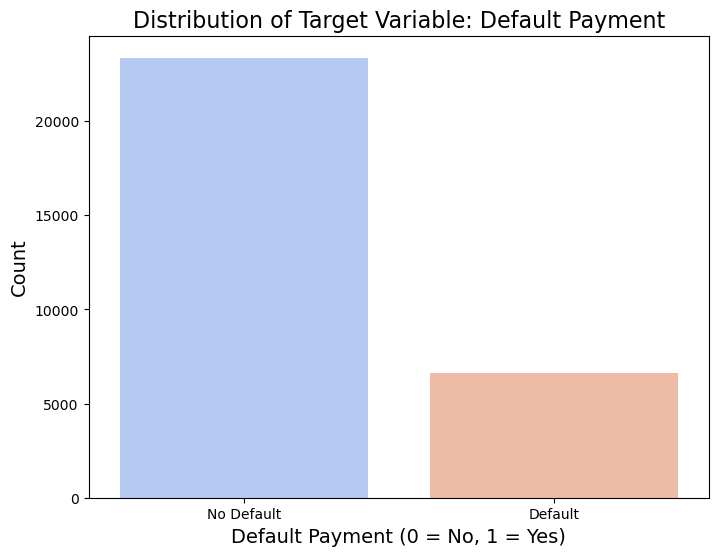

In [69]:
 #Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable: Default Payment", fontsize=16)
plt.xlabel("Default Payment (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()

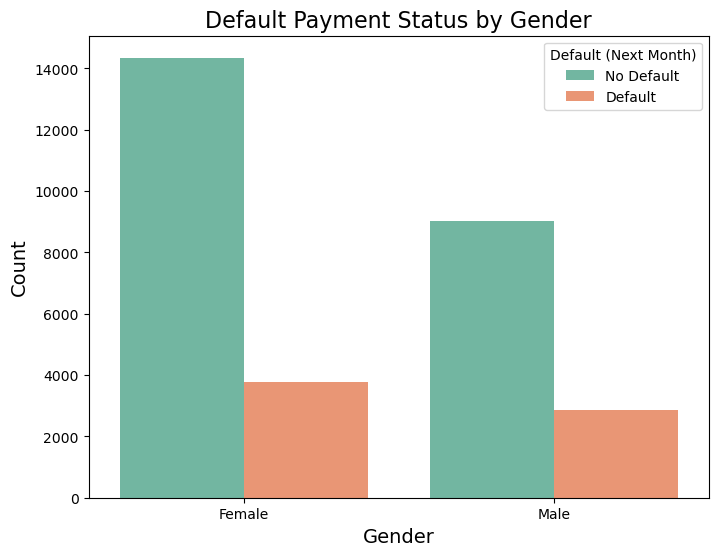

In [70]:
# Rename columns for easier handling if necessary (e.g., 'default payment next month' -> 'Default')
data.rename(columns={'default payment next month': 'Default', 'SEX': 'Gender'}, inplace=True)

# Map gender for better readability (1 = Male, 2 = Female)
data['Gender'] = data['Gender'].map({1: 'Male', 2: 'Female'})

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Default', palette='Set2')
plt.title('Default Payment Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default (Next Month)', labels=['No Default', 'Default'])
plt.show()

feature selection

Feature selection is a critical step in machine learning (ML) that involves selecting the most relevant features (input variables) for use in model building. The goal is to improve the performance of a model by reducing overfitting, improving accuracy, and reducing computational complexity.

In [115]:
X= [
     'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']
 

In [ ]:
#splitting(train test)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
#FRATURE SELECTION USING RAMDOMFOREST
rf = RandomForestClassifier(n_estimators=100,random_state=45,max_depth=5)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, random_state=45)

In [118]:
 #Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

      Feature  Importance
5       PAY_0    0.336607
6       PAY_2    0.167940
8       PAY_4    0.102733
7       PAY_3    0.099280
9       PAY_5    0.063160
10      PAY_6    0.050270
17   PAY_AMT1    0.031795
0   LIMIT_BAL    0.021693
18   PAY_AMT2    0.020635
19   PAY_AMT3    0.018753
20   PAY_AMT4    0.011715
12  BILL_AMT2    0.010979
11  BILL_AMT1    0.010330
22   PAY_AMT6    0.009824
21   PAY_AMT5    0.008530
13  BILL_AMT3    0.008165
14  BILL_AMT4    0.007428
15  BILL_AMT5    0.007419
16  BILL_AMT6    0.004236
4         AGE    0.003924
2   EDUCATION    0.003192
3    MARRIAGE    0.000763
1         SEX    0.000629


In [119]:
# Select top 10 features
top_n_features = feature_importances.head(12)
print(f"Top 10 features: {top_n_features}")

Top 10 features:       Feature  Importance
5       PAY_0    0.336607
6       PAY_2    0.167940
8       PAY_4    0.102733
7       PAY_3    0.099280
9       PAY_5    0.063160
10      PAY_6    0.050270
17   PAY_AMT1    0.031795
0   LIMIT_BAL    0.021693
18   PAY_AMT2    0.020635
19   PAY_AMT3    0.018753
20   PAY_AMT4    0.011715
12  BILL_AMT2    0.010979


SPLIT DATA INTO TRAINING AND TESTING 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (24000, 23)
Testing Features Shape: (6000, 23)
Training Target Shape: (24000,)
Testing Target Shape: (6000,)


In [121]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24000, 23)
X_test_scaled shape: (6000, 23)


MODEL BUILDING



In [122]:
# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-NN': KNeighborsClassifier(),
    'GradientBoostingClassifier' :GradientBoostingClassifier(random_state=42),
    
}


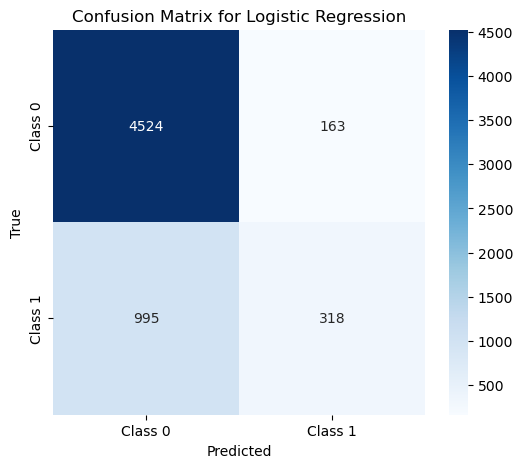

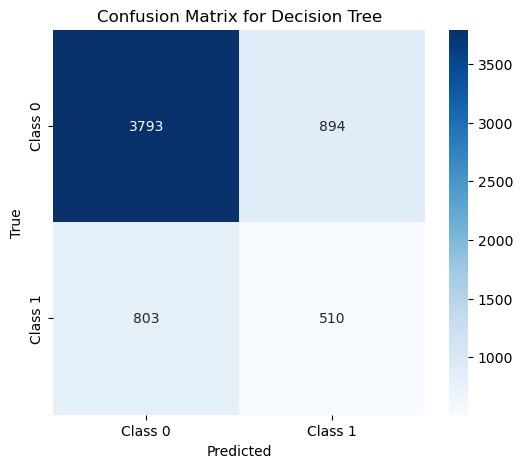

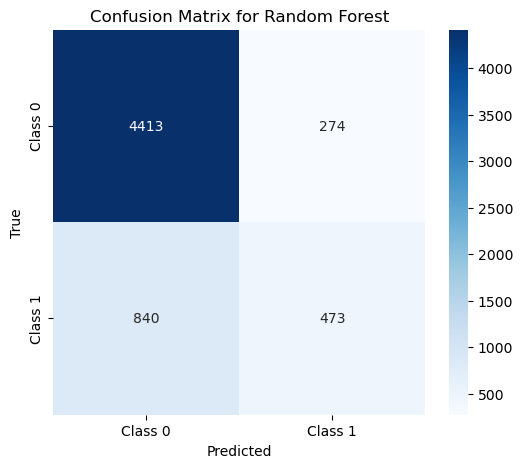

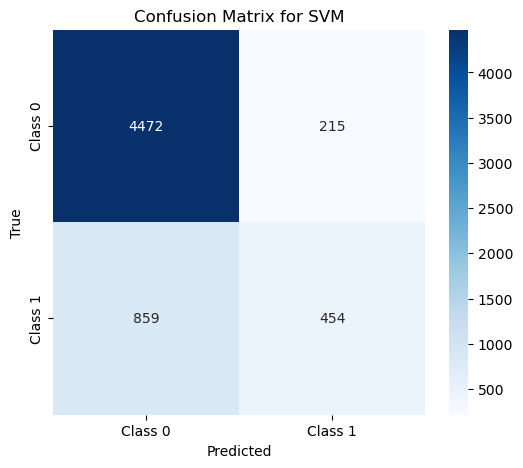

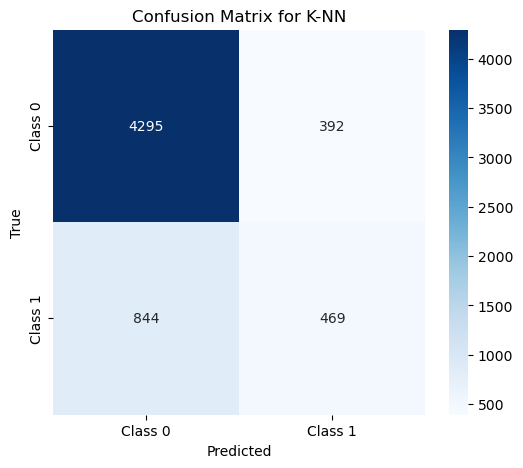

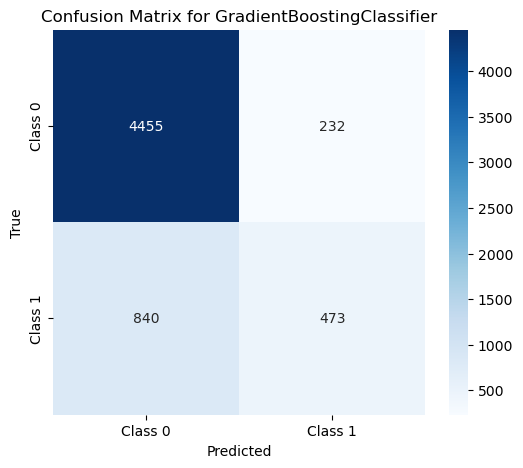


Logistic Regression:
Accuracy: 0.8070
Confusion Matrix:
[[4524  163]
 [ 995  318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.66      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Decision Tree:
Accuracy: 0.7172
Confusion Matrix:
[[3793  894]
 [ 803  510]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.36      0.39      0.38      1313

    accuracy                           0.72      6000
   macro avg       0.59      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000


Random Forest:
Accuracy: 0.8143
Confusion Matrix:
[[4413  274]
 [ 840  473]]
Classification Report:
              precision    recall  f1

In [123]:
results = {}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)

   
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    
     # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Printing results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [124]:
# Print results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.8070
Decision Tree: Accuracy = 0.7172
Random Forest: Accuracy = 0.8143
SVM: Accuracy = 0.8210
K-NN: Accuracy = 0.7940
GradientBoostingClassifier: Accuracy = 0.8213


In [125]:
best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is GradientBoostingClassifier with an accuracy of 0.8213


Hyperperameter Tuning

In [126]:
# Define the model
model = GradientBoostingClassifier(random_state=42)
     

In [127]:
# Define the parameter distribution
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}


In [128]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_score_

# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validation Score: 0.82225


In [ ]:
Evaluation after Hyperparameter Tuning

In [131]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [132]:
# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8198
Confusion Matrix:
[[4454  233]
 [ 848  465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Create Pipeline

In [133]:
 # Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),                # Standardize features
    ('model', GradientBoostingClassifier())      # Model
])


In [134]:
# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Make predictions using the test data (it automatically applies the scaling)
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8213
Confusion Matrix:
[[4455  232]
 [ 840  473]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [135]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

Save the Model

In [162]:
# Save the fitted pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline_main.pkl')

['best_model_pipeline_main.pkl']

In [ ]:
TEST WITH UNSEEN DATA

In [ ]:
Load the Pipeline

In [163]:
loaded_pipeline = joblib.load('best_model_pipeline_main.pkl')

In [164]:
df_unseen = pd.read_csv('unseendata.csv')
df_unseen.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,120000,2,2,1,30,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,20000,2,2,2,20,-1,2,0,0,0,...,2272,4455,3261,0,2000,1000,1500,0,2500,0
2,650000,2,2,2,40,0,0,0,0,0,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
3,50000,2,2,1,25,0,0,0,0,0,...,28414,28859,25547,3000,2519,2200,1000,1569,1000,1
4,40000,1,2,1,43,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,60000,1,1,2,67,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,310000,1,1,1,32,0,0,0,0,0,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,1
7,600000,1,1,2,70,0,-1,-1,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,550000,2,3,1,50,0,0,2,0,0,...,445007,473955,56000,36000,40000,39000,21239,13450,15000,0
9,200000,2,2,2,65,-2,-2,-2,-2,-1,...,221,-159,567,380,601,0,581,1687,1542,0


Splitting X and Y

In [165]:


X_unseen = df_unseen.drop('default payment next month ', axis=1)  # Drop the target column
y_actual = df_unseen['default payment next month']  # The true target labels


In [166]:
# Ensure the columns match
print("Training data columns:", X_train.columns)
print("Unseen data columns:", X_unseen.columns)

# Check for missing columns in unseen data
missing_columns = set(X_train.columns) - set(X_unseen.columns)
print(f"Missing columns in unseen data: {missing_columns}")

Training data columns: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
Unseen data columns: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
Missing columns in unseen data: set()


Predicting with Unseen Data

In [167]:

y_unseen_pred = loaded_pipeline.predict(X_unseen) # Predicted y values using pipeline

In [ ]:
Displaying predicted value and original value

In [168]:
df_unseen.head(10) #Displaying predicted values with actualvalues in dataframedf_unseen.head(25) #Displaying predicted values with actualvalues in dataframe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,120000,2,2,1,30,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,20000,2,2,2,20,-1,2,0,0,0,...,2272,4455,3261,0,2000,1000,1500,0,2500,0
2,650000,2,2,2,40,0,0,0,0,0,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
3,50000,2,2,1,25,0,0,0,0,0,...,28414,28859,25547,3000,2519,2200,1000,1569,1000,1
4,40000,1,2,1,43,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,60000,1,1,2,67,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,310000,1,1,1,32,0,0,0,0,0,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,1
7,600000,1,1,2,70,0,-1,-1,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,550000,2,3,1,50,0,0,2,0,0,...,445007,473955,56000,36000,40000,39000,21239,13450,15000,0
9,200000,2,2,2,65,-2,-2,-2,-2,-1,...,221,-159,567,380,601,0,581,1687,1542,0


In [ ]:
Evaluation with unseen data

In [169]:
# Print accuracy
print("Accuracy on Unseen Data:", accuracy_score(y_actual, y_unseen_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_unseen_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_actual, y_unseen_pred))

y_unseen_prob = best_model.predict_proba(X_unseen)[:, 1]



Accuracy on Unseen Data: 0.65
Confusion Matrix:
 [[13  2]
 [ 5  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.00      0.00      0.00         5

    accuracy                           0.65        20
   macro avg       0.36      0.43      0.39        20
weighted avg       0.54      0.65      0.59        20



In [ ]:
Evaluation with unseen data

In [ ]:
Adding predicted value to my unseen data

In [170]:
print("Accuracy on Unseen Data:", accuracy_score(y_actual, y_unseen_pred))
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_unseen_pred))
print("Classification Report:\n", classification_report(y_actual, y_unseen_pred))

Accuracy on Unseen Data: 0.65
Confusion Matrix:
 [[13  2]
 [ 5  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.00      0.00      0.00         5

    accuracy                           0.65        20
   macro avg       0.36      0.43      0.39        20
weighted avg       0.54      0.65      0.59        20



In [ ]:
Conclusion

The project successfully developed a predictive model to identify credit card payment defaults. 
The Gradient Boosting Classifier emerged as the best-performing model, achieving an accuracy of 82.22% after hyperparameter tuning.
However, despite its strong precision for predicting non-defaults, the model exhibited low recall for the minority class (defaults),
highlighting challenges with class imbalance.

In [ ]:
Model Performance

    Best Model: Gradient Boosting Classifier
    Accuracy: 82.22% (after hyperparameter tuning with GridSearchCV)
    Precision for Non-Defaults: 0.84
    Recall for Defaults: 0.35
While the model demonstrates high overall accuracy, its limited ability to identify defaults suggests a bias toward the majority class.


In [ ]:
Limitations

    Imbalanced Dataset: Non-default cases significantly outnumber defaults, leading to lower recall for the minority class.
    Model Bias: The model struggles to identify true defaults, which are critical for credit risk management.
    Generalizability: Limited performance on unseen data highlights the need for improved techniques to address class imbalance.

In [ ]:
future Improvements

    Address Class Imbalance:
        Implement oversampling techniques like SMOTE or undersampling for balancing the dataset.
        Adjust class weights in the model to improve sensitivity to defaults.

    Advanced Techniques:
        Explore deep learning methods such as neural networks or LSTMs to capture complex patterns in the data.

    Feature Engineering:
        Develop new features that provide deeper insights into payment behaviors.
        Refine existing features for better predictive power.

    Real-World Deployment:
        Build a robust system to integrate the model into financial institutions, focusing on early default prediction and risk mitigation.

By addressing the limitations and incorporating these improvements, the model’s ability to predict defaults can be enhanced, making it more effective for real-world applications.